#**Proyecto de Machine Learning**
##Tecnológico de Costa Rica - Programa de Ciencia de Datos - Aprendizaje Automático
###Estudiantes: Felipe Almanza y José Miguel Rodriguez

###**Conjunto de datos**

Para el dataset o conjunto de datos, no pudimos recurrir a datos originales por cuestiones de privacidad y de no disponibilidad por parte parte de nuestros respectivos trabajos. En este caso definimos con el profesor la utilización de este en particular https://www.kaggle.com/datasets/naiborhujosua/energy-industry. 

Vamos a predecir la tasa de churn para los clientes. Es decir, la razon en que ingresan clientes nuevos comparados a los clientes que dejarán de hacer negocios con esa entidad. Entonces en el fondo averiguaremos si un cliente es o no churn (dejará de hacer negocios).

## Conocimiento Inicial de los DataFrames

###**Columnas del data set**

- **id**: Id del contacto.

- **activity_new**: categoria de la actividad de la compañia.

- **campaigndiscele**: codigo de campaña de electricidad a la que el cliente se suscribio por ultima vez.

- **channel_sales**: código del canal de ventas

- **cons_12m**: consumo de electricidad en los últimos 12 meses.

- **consgas12m**: consumo de gas en los últimos 12 meses.

- **conslastmonth**: consumo de electricidad en el último mes.

- **date_activ**: fecha de activación del contrato.

- **date_end**: fecha registrada de la finalización del contrato.

- **datefirstactiv**: fecha del primer contrato del cliente.

- **datemodifprod**: fecha de la última modificación del producto.

- **date_renewal**: fecha de la siguiente renovación del contrato.

- **forecastbasebill_ele**: baseline del recibo de electricicad pronosticado para el siguiente mes.

- **forecastbasebill_year**: baseline del recibo de electricicad pronosticado para el año calendario.

- **forecastbill12m**: baseline del recibo de electricicad pronosticado para 12 meses.

- **forecast_cons**: consumo eléctrico pronosticado para el siguiente mes.

- **forecastcons12m**: consumo eléctrico pronosticado para los siguientes 12 meses.

- **forecastconsyear**: consumo eléctrico pronosticado para el siguiente año calendario.

- **forecastdiscountenergy**: valor pronosticado del descuento actual.

- **forecastmeterrent_12m**: valor de renta del medidor para los siguientes 12 meses.

- **forecastpriceenergy_p1**: precio de energia pronosticado para el 1er periodo.

- **forecastpriceenergy_p2**: precio de energia pronosticado para el 2do periodo.

- **forecastpricepow_p1**: precio de potencia pronosticado para el 1er periodo.

- **has_gas**: indica si el cliente tambien es un cliente de gas.

- **imp_cons**: consumo pagado actualmente

- **margingrosspow_ele**: margen bruto de suscripción de energía.
 
- **marginnetpow_ele**: margen neto de subscripción de energía.

- **nbprodact**: númoro de productos y servicios activos

- **net_margin**: margen neto total

- **numyearsantig**: antigüedad del cliente en número de años

- **origin_up**: codigo de campaña de electricidad a la que el cliente se suscribio por primera vez.

- **pow_max**: energia subscrita

- **price_date**: fecha de referencia

- **pricep1var**: precio de la energia para el 1er periodo

- **pricep2var**: precio de la energia para el 2do periodo

- **pricep3var**: precio de la energia para el 3er periodo

- **pricep1fix**: price of power for the 1st period

- **pricep2fix**: price of power for the 2nd period

- **pricep3fix**: price of power for the 3rd period

- **churned**: el cliente ha hecho churn en algun momento en los proximos 3 meses.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Debido a que el set de datos viene separado, iniciamos por cargar los 3 archivos en diferentes dataframes

In [2]:
#El dataset viene separado en tres archivos csv.

rawCustomerDS = pd.read_csv('https://raw.githubusercontent.com/FelipeAlmanza/ProyectoML/main/ml_case_training_data.csv')

rawPriceDS = pd.read_csv('https://raw.githubusercontent.com/FelipeAlmanza/ProyectoML/main/ml_case_training_hist_data.csv')

rawChurnDS = pd.read_csv('https://raw.githubusercontent.com/FelipeAlmanza/ProyectoML/main/ml_case_training_output.csv')

pd.set_option('display.max_columns', None)

### Tipos de datos, cantidad de registros y ejemplos de los datos en los DataFrames


#### Dataframe de clientes

In [3]:
#Tipos de datos
rawCustomerDS.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [4]:
#Cantidad de columnas
rawCustomerDS.shape

(16096, 32)

In [5]:
#Ejemplo de los datos
rawCustomerDS.head()

id                      activity_new  \
0  48ada52261e7cf58715202705a0451c9  esoiiifxdlbkcsluxmfuacbdckommixw   
1  24011ae4ebbe3035111d65fa7c15bc57                               NaN   
2  d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3  764c75f661154dac3a6c254cd082ea7d                               NaN   
4  bba03439a292a1e166f80264c16191cb                               NaN   

   campaign_disc_ele                     channel_sales  cons_12m  \
0                NaN  lmkebamcaaclubfxadlmueccxoimlema    309275   
1                NaN  foosdfpfkusacimwkcsosbicdxkicaua         0   
2                NaN                               NaN      4660   
3                NaN  foosdfpfkusacimwkcsosbicdxkicaua       544   
4                NaN  lmkebamcaaclubfxadlmueccxoimlema      1584   

   cons_gas_12m  cons_last_month  date_activ    date_end date_first_activ  \
0             0            10025  2012-11-07  2016-11-06              NaN   
1         54946                0  2013-06-15  2016-06-15              NaN   
2             0                0  2009-08-21  2016-08-30              NaN   
3             0                0  2010-04-16  2016-04-16              NaN   
4             0                0  2010-03-30  2016-03-30              NaN   

  date_modif_prod date_renewal  forecast_base_bill_ele  \
0      2012-11-07   2015-11-09                     NaN   
1             NaN   2015-06-23                     NaN   
2      2009-08-21   2015-08-31                     NaN   
3      2010-04-16   2015-04-17                     NaN   
4      2010-03-30   2015-03-31                     NaN   

   forecast_base_bill_year  forecast_bill_12m  forecast_cons  \
0                      NaN                NaN            NaN   
1                      NaN                NaN            NaN   
2                      NaN                NaN            NaN   
3                      NaN                NaN            NaN   
4                      NaN                NaN            NaN   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           26520.30               10025                       0.0   
1               0.00                   0                       0.0   
2             189.95                   0                       0.0   
3              47.96                   0                       0.0   
4             240.04                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_p1  \
0                   359.29                  0.095919   
1                     1.78                  0.114481   
2                    16.27                  0.145711   
3                    38.72                  0.165794   
4                    19.83                  0.146694   

   forecast_price_energy_p2  forecast_price_pow_p1 has_gas  imp_cons  \
0                  0.088347              58.995952       f     831.8   
1                  0.098142              40.606701       t       0.0   
2                  0.000000              44.311378       f       0.0   
3                  0.087899              44.311378       f       0.0   
4                  0.000000              44.311378       f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                -41.76              -41.76            1     1732.36   
1                 25.44               25.44            2      678.99   
2                 16.38               16.38            1       18.89   
3                 28.60               28.60            1        6.60   
4                 30.22               30.22            1       25.46   

   num_years_antig                         origin_up  pow_max  
0                3  ldkssxwpmemidmecebumciepifcamkci  180.000  
1                3  lxidpiddsbxsbosboudacockeimpuepw   43.648  
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800  
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856  
4                6  kamkkxfxxuwbdslkwifmmcsi

#### Dataframe de precios

In [6]:
#Tipos de datos
rawPriceDS.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [7]:
#Cantidad de columnas
rawPriceDS.shape

(193002, 8)

In [8]:
#Ejemplo de los datos
rawPriceDS.head()

id  price_date  price_p1_var  price_p2_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01      0.151367           0.0   
1  038af19179925da21a25619c5a24b745  2015-02-01      0.151367           0.0   
2  038af19179925da21a25619c5a24b745  2015-03-01      0.151367           0.0   
3  038af19179925da21a25619c5a24b745  2015-04-01      0.149626           0.0   
4  038af19179925da21a25619c5a24b745  2015-05-01      0.149626           0.0   

   price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  
0           0.0     44.266931           0.0           0.0  
1           0.0     44.266931           0.0           0.0  
2           0.0     44.266931           0.0           0.0  
3           0.0     44.266931           0.0           0.0  
4           0.0     44.266931           0.0           0.0

#### Dataframe de churn

In [9]:
#Tipos de datos
rawChurnDS.dtypes

id       object
churn     int64
dtype: object

In [10]:
#Cantidad de columnas
rawChurnDS.shape

(16096, 2)

In [11]:
#Ejemplo de los datos
rawChurnDS.head()

id  churn
0  48ada52261e7cf58715202705a0451c9      0
1  24011ae4ebbe3035111d65fa7c15bc57      1
2  d29c2c54acc38ff3c0614d0a653813dd      0
3  764c75f661154dac3a6c254cd082ea7d      0
4  bba03439a292a1e166f80264c16191cb      0

## Limpieza y pre procesado de datos

### Revisar valores nulos

#### Nulos en dataframe de clientes

In [12]:
rawCustomerDS.isna().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

Se aprecian bastantes valores nulos, se examina el porcentaje de valores nulos con respecto al total de filas, en caso de ser más de 50% se excluirá la columna, en caso de ser menor al 50% se utilizará la media

In [13]:
ammountRowsDFCustomer = rawCustomerDS.shape[0]
print('Porcentaje de valores nulos:',(rawCustomerDS.isna().sum()*100)/ammountRowsDFCustomer)

Porcentaje de valores nulos: id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000

En este caso determinamos que las columnas: 
* activity_new 
* campaign_disc_ele 
* date_first_activ 
* forecast_base_bill_ele 
* forecast_base_bill_year
* forecast_bill_12m
* forecast_cons

Tienen porcentajes de valores nulos muy elevados por lo que se decide eliminarlas

In [14]:
#Se genera una copia de DF para trabajarlo
cleanDFCustomer = rawCustomerDS.copy(deep=True)

#Se eliminan las columnas
cleanDFCustomer.drop(['activity_new','campaign_disc_ele','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons',],axis=1, inplace=True)


Para las columnas numéricas restantes se llenaran utilizando la media

In [15]:
cleanDFCustomer['forecast_discount_energy'].fillna(cleanDFCustomer['forecast_discount_energy'].mean(), inplace=True)
cleanDFCustomer['forecast_price_energy_p1'].fillna(cleanDFCustomer['forecast_price_energy_p1'].mean(), inplace=True)
cleanDFCustomer['forecast_price_energy_p2'].fillna(cleanDFCustomer['forecast_price_energy_p2'].mean(), inplace=True)
cleanDFCustomer['forecast_price_pow_p1'].fillna(cleanDFCustomer['forecast_price_pow_p1'].mean(), inplace=True)
cleanDFCustomer['pow_max'].fillna(cleanDFCustomer['pow_max'].mean(), inplace=True)
cleanDFCustomer['margin_gross_pow_ele'].fillna(cleanDFCustomer['margin_gross_pow_ele'].mean(), inplace=True)
cleanDFCustomer['margin_net_pow_ele'].fillna(cleanDFCustomer['margin_net_pow_ele'].mean(), inplace=True)
cleanDFCustomer['net_margin'].fillna(cleanDFCustomer['net_margin'].mean(), inplace=True)

Para las columnas channel_sales y origin_up que son categoricas se aplicará label encoding, esto hará que los valores nulos queden en -1, por lo que seguidamente se obtendrá la media de las etiquetas diferentes de -1 y se asignará a los valores faltantes en el DataFrame

*Se realiza lo indicado para origin_up*

In [16]:
#Se realiza el label enconding
cleanDFCustomer['origin_up'] = cleanDFCustomer['origin_up'].astype('category')
cleanDFCustomer['origin_up'] = cleanDFCustomer['origin_up'].cat.codes

#Extraemos las etiquetas generadas
originUniques = cleanDFCustomer['origin_up'].unique()
print('Labels generados',originUniques)

#Removemos el -1 que representa valores nulos
originUniques = originUniques[originUniques != -1]
print('Labels Resultantes despues de eliminar el -1',originUniques)

#Reemplazamos los -1 con la media de los labels generados
cleanDFCustomer['origin_up'].replace(-1,originUniques.mean().round(), inplace=True)
print('Valores resultantes despues de hacer el replace',cleanDFCustomer['origin_up'].unique())

Labels generados [ 2  3  1 -1  4  0]
Labels Resultantes despues de eliminar el -1 [2 3 1 4 0]
Valores resultantes despues de hacer el replace [2 3 1 4 0]


*Se realiza lo indicado para channel_sales*

In [17]:
#Se realiza el label enconding
cleanDFCustomer['channel_sales'] = cleanDFCustomer['channel_sales'].astype('category')
cleanDFCustomer['channel_sales'] = cleanDFCustomer['channel_sales'].cat.codes

#Extraemos las etiquetas generadas
channelUniques = cleanDFCustomer['channel_sales'].unique()
print('Labels generados',channelUniques)

#Removemos el -1 que representa valores nulos
channelUniques = channelUniques[channelUniques != -1]
print('Labels Resultantes despues de eliminar el -1',channelUniques)

#Reemplazamos los -1 con la media de los labels generados
cleanDFCustomer['channel_sales'].replace(-1,channelUniques.mean().round(), inplace=True)
print('Valores resultantes despues de hacer el replace',cleanDFCustomer['channel_sales'].unique())

Labels generados [ 4  3 -1  6  1  0  5  2]
Labels Resultantes despues de eliminar el -1 [4 3 6 1 0 5 2]
Valores resultantes despues de hacer el replace [4 3 6 1 0 5 2]


Para las columnas restantes simplemente se eliminan las filas nulas

In [18]:
cleanDFCustomer = cleanDFCustomer.dropna()

Revision de que no queden valores nulos

In [19]:
cleanDFCustomer.isna().sum()

id                          0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
dtype: int64

#### Nulos en dataframe de precio

In [20]:
rawPriceDS.isna().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

Se aprecian bastantes valores nulos, se examina el porcentaje de valores nulos con respecto al total de filas, en caso de ser más de 50% se excluirá la columna, en caso de ser menor al 50% se utilizará la media

In [21]:
ammountRowsDFPrice = rawPriceDS.shape[0]
print('Porcentaje de valores nulos:',(rawPriceDS.isna().sum()*100)/ammountRowsDFPrice)

Porcentaje de valores nulos: id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64


Ninguna columna excede el 50% y al ser todas numéricas, rellenaremos los nulos con la media

In [22]:
#Se genera una copia de DF para trabajarlo
cleanDFPrice = rawPriceDS.copy(deep=True)

cleanDFPrice['price_p1_var'].fillna(cleanDFPrice['price_p1_var'].mean(), inplace=True)
cleanDFPrice['price_p2_var'].fillna(cleanDFPrice['price_p2_var'].mean(), inplace=True)
cleanDFPrice['price_p3_var'].fillna(cleanDFPrice['price_p3_var'].mean(), inplace=True)
cleanDFPrice['price_p1_fix'].fillna(cleanDFPrice['price_p1_fix'].mean(), inplace=True)
cleanDFPrice['price_p2_fix'].fillna(cleanDFPrice['price_p2_fix'].mean(), inplace=True)
cleanDFPrice['price_p3_fix'].fillna(cleanDFPrice['price_p3_fix'].mean(), inplace=True)


Revision de que no queden valores nulos

In [23]:
cleanDFPrice.isna().sum()

id              0
price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

#### Nulos en dataframe de churn


In [24]:
rawChurnDS.isna().sum()

id       0
churn    0
dtype: int64

No hay valores nulos por lo que no hace falta realizar ninguna limpieza

### Generar DataFrame unificado

Despues de el entendimiento del dataframe, se nota que los 3 tienen el campo ID, por lo que se quiere ver la posibilidad de unificar los 3 dataframes.

Iniciaremos por verificar que los IDs en los 3 dataframes coincidan

In [25]:
print('Tamaño del DataFrame de Cliente', cleanDFCustomer.shape[0])
#Revisamos si todos los IDs de clientes aparecen en precios
cleanDFCustomer.id.isin(cleanDFPrice.id).astype(int)

Tamaño del DataFrame de Cliente 15900


0        1
2        1
3        1
4        1
5        1
        ..
16091    1
16092    1
16093    1
16094    1
16095    1
Name: id, Length: 15900, dtype: int64

Podemos ver que todos los IDs que aparecen en el DataFrame de clientes aparecen en el de precios por lo que se podrian unificar.

Realizamos esta misma comparación contra el DataFrame de Churn

In [26]:
cleanDFCustomer.id.isin(rawChurnDS.id).astype(int)

0        1
2        1
3        1
4        1
5        1
        ..
16091    1
16092    1
16093    1
16094    1
16095    1
Name: id, Length: 15900, dtype: int64

Al igual que con el DataFrame de precios, todos los IDs existentes en el DataFrame de Clientes aparecen en el DataFrame de Churn

Una vez validado esto, procedemos a hacer el merge

In [27]:
powerCoDataFrame = pd.merge(cleanDFCustomer,cleanDFPrice, on='id')
powerCoDataFrame = pd.merge(powerCoDataFrame,rawChurnDS, on='id')

powerCoDataFrame.head()

id  channel_sales  cons_12m  cons_gas_12m  \
0  48ada52261e7cf58715202705a0451c9              4    309275             0   
1  48ada52261e7cf58715202705a0451c9              4    309275             0   
2  48ada52261e7cf58715202705a0451c9              4    309275             0   
3  48ada52261e7cf58715202705a0451c9              4    309275             0   
4  48ada52261e7cf58715202705a0451c9              4    309275             0   

   cons_last_month  date_activ    date_end date_modif_prod date_renewal  \
0            10025  2012-11-07  2016-11-06      2012-11-07   2015-11-09   
1            10025  2012-11-07  2016-11-06      2012-11-07   2015-11-09   
2            10025  2012-11-07  2016-11-06      2012-11-07   2015-11-09   
3            10025  2012-11-07  2016-11-06      2012-11-07   2015-11-09   
4            10025  2012-11-07  2016-11-06      2012-11-07   2015-11-09   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0            26520.3               10025                       0.0   
1            26520.3               10025                       0.0   
2            26520.3               10025                       0.0   
3            26520.3               10025                       0.0   
4            26520.3               10025                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_p1  \
0                   359.29                  0.095919   
1                   359.29                  0.095919   
2                   359.29                  0.095919   
3                   359.29                  0.095919   
4                   359.29                  0.095919   

   forecast_price_energy_p2  forecast_price_pow_p1 has_gas  imp_cons  \
0                  0.088347              58.995952       f     831.8   
1                  0.088347              58.995952       f     831.8   
2                  0.088347              58.995952       f     831.8   
3                  0.088347              58.995952       f     831.8   
4                  0.088347              58.995952       f     831.8   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                -41.76              -41.76            1     1732.36   
1                -41.76              -41.76            1     1732.36   
2                -41.76              -41.76            1     1732.36   
3                -41.76              -41.76            1     1732.36   
4                -41.76              -41.76            1     1732.36   

   num_years_antig  origin_up  pow_max  price_date  price_p1_var  \
0                3          2    180.0  2015-01-01      0.106043   
1                3          2    180.0  2015-02-01      0.106043   
2                3          2    180.0  2015-03-01      0.106043   
3                3          2    180.0  2015-04-01      0.106043   
4                3          2    180.0  2015-05-01      0.106043   

   price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  churn  
0      0.093474      0.067378     58.936774     36.344726       8.33426      0  
1      0.093474      0.067378     58.936774     36.344726       8.33426      0  
2      0.093474      0.067378     58.936774     36.344726       8.33426      0  
3      0.093474      0.067378     58.936774     36.344726       8.33426      0  
4      0.093474      0.067378     58.936774     36.344726       8.33426      0

### Cambio de formato de columnas date

Para el caso de las columnas que sean de tipo date, generaremos 3 columnas adicionales por cada columna existente, que representaran el año, mes y día

Lo primero es convertir los campos a tipo date ya que estan como objetos

In [28]:
powerCoDataFrame['date_activ'] = pd.to_datetime(powerCoDataFrame['date_activ'])
powerCoDataFrame['date_end'] = pd.to_datetime(powerCoDataFrame['date_end'])
powerCoDataFrame['date_modif_prod'] = pd.to_datetime(powerCoDataFrame['date_modif_prod'])
powerCoDataFrame['date_renewal'] = pd.to_datetime(powerCoDataFrame['date_renewal'])
powerCoDataFrame['price_date'] = pd.to_datetime(powerCoDataFrame['price_date'])


In [29]:
powerCoDataFrame.dtypes

id                                  object
channel_sales                         int8
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                             object
imp_cons                           float64
margin_gross_pow_ele               float64
margin_net_pow_ele                 float64
nb_prod_act                          int64
net_margin                         float64
num_years_antig                      int64
origin_up  

Se extrae el año, mes y día para el campo de date_activ

In [30]:
powerCoDataFrame['dateActiv_year'] = powerCoDataFrame['date_activ'].dt.year
powerCoDataFrame['dateActiv_month'] = powerCoDataFrame['date_activ'].dt.month
powerCoDataFrame['dateActiv_day'] = powerCoDataFrame['date_activ'].dt.day
powerCoDataFrame.drop(['date_activ'],axis=1,inplace=True)


Se extrae el año, mes y día para el campo de date_end

In [31]:
powerCoDataFrame['dateEnd_year'] = powerCoDataFrame['date_end'].dt.year
powerCoDataFrame['dateEnd_month'] = powerCoDataFrame['date_end'].dt.month
powerCoDataFrame['dateEnd_day'] = powerCoDataFrame['date_end'].dt.day
powerCoDataFrame.drop(['date_end'],axis=1,inplace=True)

Se extrae el año, mes y día para el campo de date_modif_prod

In [32]:
powerCoDataFrame['dateModifProd_year'] = powerCoDataFrame['date_modif_prod'].dt.year
powerCoDataFrame['dateModifProd_month'] = powerCoDataFrame['date_modif_prod'].dt.month
powerCoDataFrame['dateModifProd_day'] = powerCoDataFrame['date_modif_prod'].dt.day
powerCoDataFrame.drop(['date_modif_prod'],axis=1,inplace=True)

Se extrae el año, mes y día para el campo de date_renewal

In [33]:
powerCoDataFrame['dateRenewal_year'] = powerCoDataFrame['date_renewal'].dt.year
powerCoDataFrame['dateRenewal_month'] = powerCoDataFrame['date_renewal'].dt.month
powerCoDataFrame['dateRenewal_day'] = powerCoDataFrame['date_renewal'].dt.day
powerCoDataFrame.drop(['date_renewal'],axis=1,inplace=True)

Se extrae el año, mes y día para el campo de price_date

In [34]:
powerCoDataFrame['priceDate_year'] = powerCoDataFrame['price_date'].dt.year
powerCoDataFrame['priceDate_month'] = powerCoDataFrame['price_date'].dt.month
powerCoDataFrame['priceDate_day'] = powerCoDataFrame['price_date'].dt.day
powerCoDataFrame.drop(['price_date'],axis=1,inplace=True)

Se revisa el DataFrame resultante

In [35]:
powerCoDataFrame.head()

id  channel_sales  cons_12m  cons_gas_12m  \
0  48ada52261e7cf58715202705a0451c9              4    309275             0   
1  48ada52261e7cf58715202705a0451c9              4    309275             0   
2  48ada52261e7cf58715202705a0451c9              4    309275             0   
3  48ada52261e7cf58715202705a0451c9              4    309275             0   
4  48ada52261e7cf58715202705a0451c9              4    309275             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0            10025            26520.3               10025   
1            10025            26520.3               10025   
2            10025            26520.3               10025   
3            10025            26520.3               10025   
4            10025            26520.3               10025   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                   359.29   
1                       0.0                   359.29   
2                       0.0                   359.29   
3                       0.0                   359.29   
4                       0.0                   359.29   

   forecast_price_energy_p1  forecast_price_energy_p2  forecast_price_pow_p1  \
0                  0.095919                  0.088347              58.995952   
1                  0.095919                  0.088347              58.995952   
2                  0.095919                  0.088347              58.995952   
3                  0.095919                  0.088347              58.995952   
4                  0.095919                  0.088347              58.995952   

  has_gas  imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
0       f     831.8                -41.76              -41.76            1   
1       f     831.8                -41.76              -41.76            1   
2       f     831.8                -41.76              -41.76            1   
3       f     831.8                -41.76              -41.76            1   
4       f     831.8                -41.76              -41.76            1   

   net_margin  num_years_antig  origin_up  pow_max  price_p1_var  \
0     1732.36                3          2    180.0      0.106043   
1     1732.36                3          2    180.0      0.106043   
2     1732.36                3          2    180.0      0.106043   
3     1732.36                3          2    180.0      0.106043   
4     1732.36                3          2    180.0      0.106043   

   price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  \
0      0.093474      0.067378     58.936774     36.344726       8.33426   
1      0.093474      0.067378     58.936774     36.344726       8.33426   
2      0.093474      0.067378     58.936774     36.344726       8.33426   
3      0.093474      0.067378     58.936774     36.344726       8.33426   
4      0.093474      0.067378     58.936774     36.344726       8.33426   

   churn  dateActiv_year  dateActiv_month  dateActiv_day  dateEnd_year  \
0      0            2012               11              7          2016   
1      0            2012               11              7          2016   
2      0            2012               11              7          2016   
3      0            2012               11              7          2016   
4      0            2012               11              7          2016   

   dateEnd_month  dateEnd_day  dateModifProd_year  dateModifProd_month  \
0             11            6                2012                   11   
1             11            6                2012                   11   
2             11            6                2012                   11   
3             11            6                2012                   11   
4             11            6                2012                   11   

   dateModifProd_day  dateRenewal_year  dateRenewal_month  dateRenewal_day  \
0                  7              2015                 11                9   
1   

In [36]:
#La columna has_gas contiene como valores los caracteres f y t (true o false).

print(powerCoDataFrame['has_gas'].unique())

#Los pasaremos a valores booleanos de 0 y 1.

powerCoDataFrame['has_gas'].replace('f', 0, inplace = True)

powerCoDataFrame['has_gas'].replace('t', 1, inplace = True)

print(powerCoDataFrame['has_gas'].unique())

['f' 't']
[0 1]


## Analisis Exploratorio

Iniciaremos viendo una descripción más detallada del dataframe powerCoDataFrame.

In [37]:
powerCoDataFrame.describe()

channel_sales      cons_12m  cons_gas_12m  cons_last_month  \
count  190659.000000  1.906590e+05  1.906590e+05     1.906590e+05   
mean        3.279892  1.931133e+05  3.182718e+04     1.930397e+04   
std         1.052513  6.749026e+05  1.776431e+05     8.203224e+04   
min         0.000000 -1.252760e+05 -3.037000e+03    -9.138600e+04   
25%         3.000000  5.888000e+03  0.000000e+00     0.000000e+00   
50%         3.000000  1.528200e+04  0.000000e+00     8.980000e+02   
75%         3.000000  4.978500e+04  0.000000e+00     4.112000e+03   
max         6.000000  1.609711e+07  4.188440e+06     4.538720e+06   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
count      190659.000000       190659.000000             190659.000000   
mean         2362.435692         1904.298166                  0.980223   
std          4027.011196         5266.424810                  5.112784   
min        -16689.260000       -85627.000000                  0.000000   
25%           512.060000            0.000000                  0.000000   
50%          1177.250000          377.000000                  0.000000   
75%          2685.585000         1995.000000                  0.000000   
max        103801.930000       175375.000000                 50.000000   

       forecast_meter_rent_12m  forecast_price_energy_p1  \
count            190659.000000             190659.000000   
mean                 70.330453                  0.135894   
std                  79.069669                  0.026181   
min                -242.960000                  0.000000   
25%                  16.230000                  0.115237   
50%                  19.440000                  0.142822   
75%                 131.490000                  0.146348   
max                2411.690000                  0.273963   

       forecast_price_energy_p2  forecast_price_pow_p1        has_gas  \
count             190659.000000          190659.000000  190659.000000   
mean                   0.052934              43.533943       0.183380   
std                    0.048436               5.210339       0.386979   
min                    0.000000              -0.122184       0.000000   
25%                    0.000000              40.606701       0.000000   
50%                    0.085803              44.311378       0.000000   
75%                    0.098837              44.311378       0.000000   
max                    0.195975              59.444710       1.000000   

            imp_cons  margin_gross_pow_ele  margin_net_pow_ele    nb_prod_act  \
count  190659.000000         190659.000000        190659.00000  190659.000000   
mean      195.763163             22.447440            21.43454       1.346677   
std       494.995453             23.734418            27.99102       1.466435   
min     -9038.210000           -525.540000          -615.66000       1.000000   
25%         0.000000             11.950000            11.94000       1.000000   
50%        44.300000             21.050000            20.97000       1.000000   
75%       217.940000             29.640000            29.64000       1.000000   
max     15042.790000            374.640000           374.64000      32.000000   

          net_margin  num_years_antig      origin_up        pow_max  \
count  190659.000000    190659.000000  190659.000000  190659.000000   
mean      218.161571         5.049486       2.200143      20.568374   
std       365.169589         1.671306       0.853244      21.746559   
min     -4148.990000         1.000000       0.000000       1.000000   
25%        51.970000         4.000000       1.000000      12.500000   
50%       119.710000         5.000000       2.000000      13.856000   
75%       275.050000         6.000000       3.000000      19.800000   
max     24570.650000        16.000000       4.000000     500.000000   

        price_p1_var   price_p2_var   price_p3_var   price_p1_fix  \
count  190659.000000  190659.000000  190659.000000  190659.000000   
mean       

### Revisar Balanceo de Datos

Iniciaremos con un grafico para determinar la distribución de los valores Churn en el set de datos, esto para determinar un posible desbalanceo

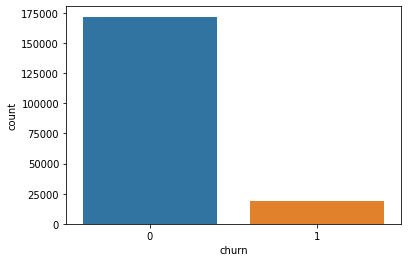

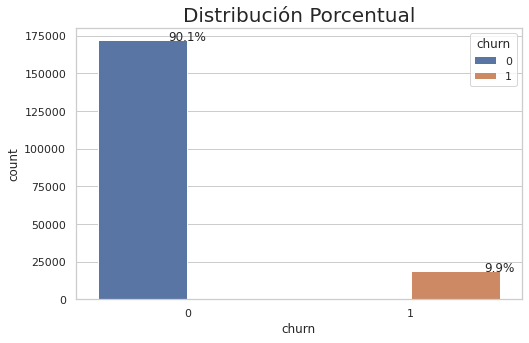

In [38]:
#Grafico mostrando distribución de churn numérica
sns.countplot(x='churn', data=powerCoDataFrame)

#Grafico mostrando distribución de churn porcentual
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(powerCoDataFrame))
ax = sns.countplot(x="churn", hue="churn", data=powerCoDataFrame)
plt.title('Distribución Porcentual', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Claramente hay un desbalanceo en los datos, por lo que se deberan realizar experimentos con la data actual y luego aplicando técnicas de over-sampling y under-sampling para evaluar los resultados.

Referencia: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

### Covarianza de los datos

Realizamos una matriz de covarianza para ver la relación entre los datos

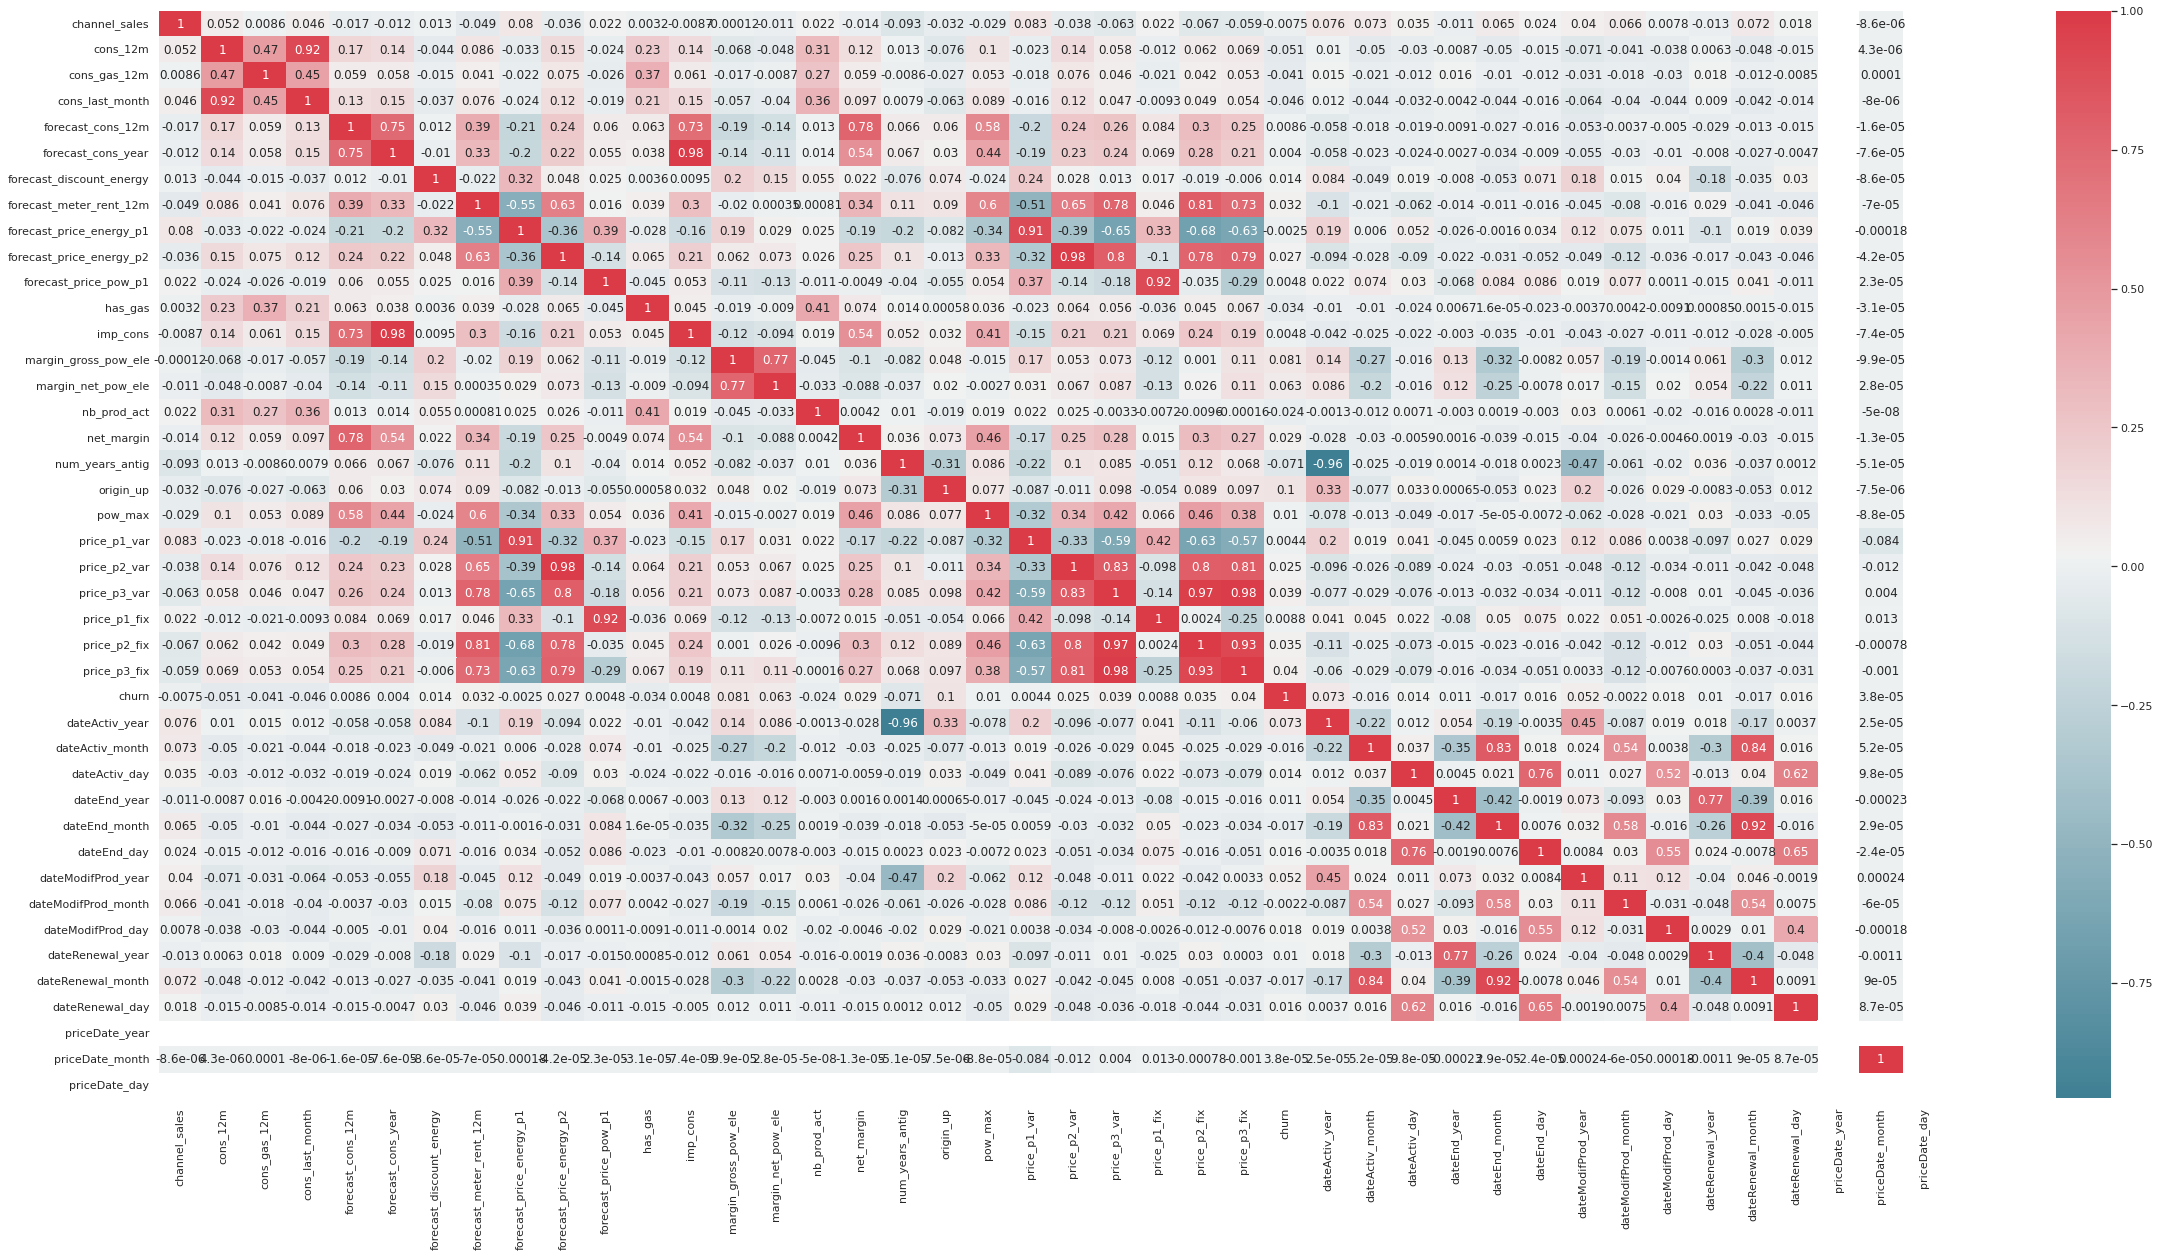

In [39]:
def matrizConvarianza(dataframe):
    _,ax=plt.subplots(figsize=(40,20))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(dataframe.corr(),annot=True,cmap=colormap)

matrizConvarianza(powerCoDataFrame)

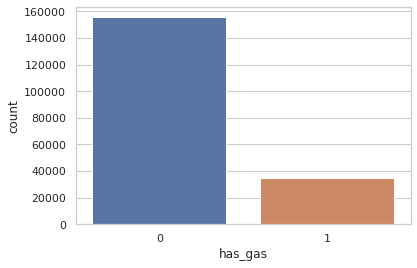

In [40]:
sns.countplot(x= 'has_gas', data=powerCoDataFrame)

La mayoría de los clientes no poseen servicios de gas.

---

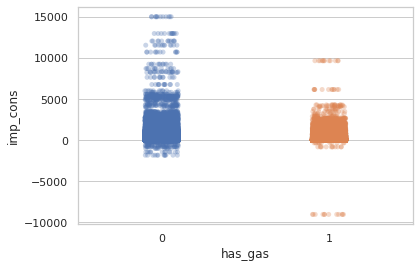

In [41]:
sns.stripplot(x='has_gas', y='imp_cons', data=powerCoDataFrame, alpha=0.3, jitter=True);

Hay valores negativos para la característica de consumo. Era de esperar que el consumo eléctrico de los clientea que tienen gas es menor en general que el de los que no tienen.

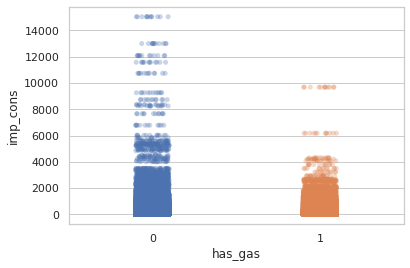

In [42]:
powerCoDataFrame = powerCoDataFrame[powerCoDataFrame['imp_cons'] >= 0]
sns.stripplot(x='has_gas', y='imp_cons', data=powerCoDataFrame, alpha=0.3, jitter=True);

---

Con base a la matriz generaremos graficos de relación para las variables que más se relacionan con Churn

In [43]:
##Funcion para calcular std y mean de una columna para los limites y eliminar outliers
# Retorna la desviación estandar y la media de una columna
def columnLimits(column, dataset):
  standard_deviation = dataset[column].std()
  mean = dataset[column].mean()
  lowerLimit = (mean - 2*standard_deviation)
  upperLimit = (mean + 2*standard_deviation)
  return lowerLimit, upperLimit

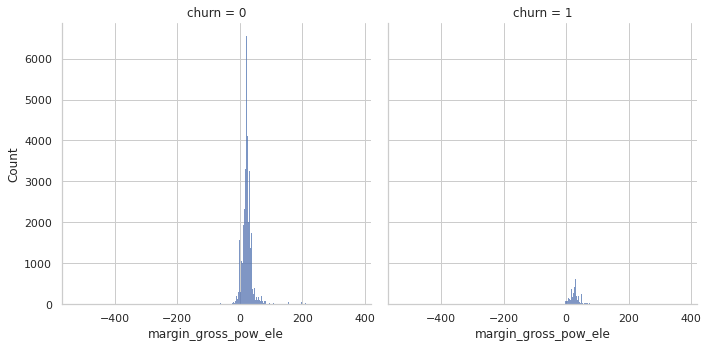

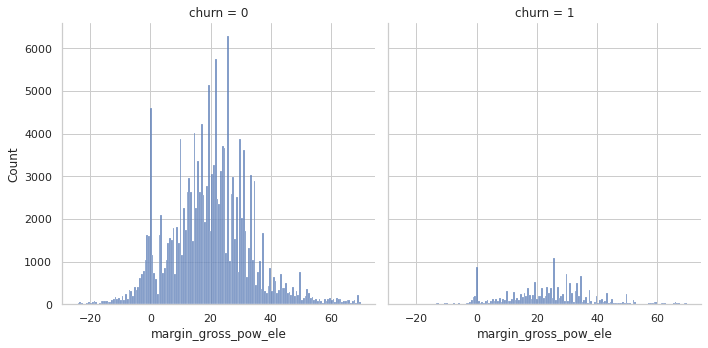

In [44]:
sns.displot(data=powerCoDataFrame, x="margin_gross_pow_ele", col="churn")

lowerLimit, upperLimit = columnLimits('margin_gross_pow_ele', powerCoDataFrame)

powerCoDataFrame = powerCoDataFrame[(powerCoDataFrame['margin_gross_pow_ele'] > lowerLimit) & (powerCoDataFrame['margin_gross_pow_ele'] < upperLimit)]

sns.displot(data=powerCoDataFrame, x="margin_gross_pow_ele", col="churn")


Se observaron muchos valores que estan fuera del rango común y representan valores muy lejanos. Se eliminan para no tomarlos en cuenta.

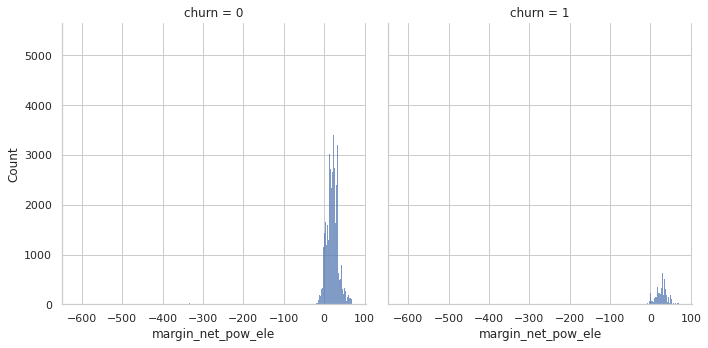

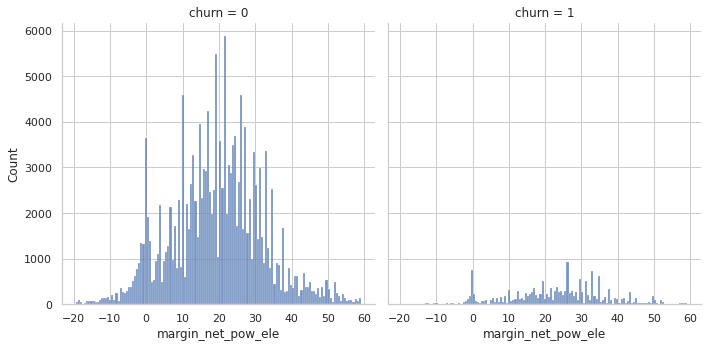

In [45]:
sns.displot(data=powerCoDataFrame, x="margin_net_pow_ele", col="churn")

lowerLimit, upperLimit = columnLimits('margin_net_pow_ele', powerCoDataFrame)

powerCoDataFrame = powerCoDataFrame[(powerCoDataFrame['margin_net_pow_ele'] > lowerLimit) & (powerCoDataFrame['margin_net_pow_ele'] < upperLimit)]

sns.displot(data=powerCoDataFrame, x="margin_net_pow_ele", col="churn")

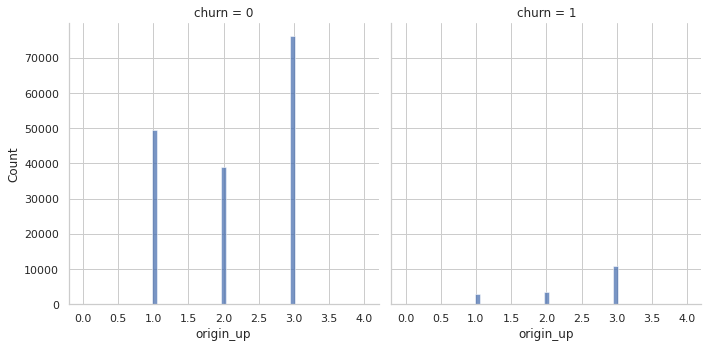

In [46]:
sns.displot(data=powerCoDataFrame, x="origin_up", col="churn")

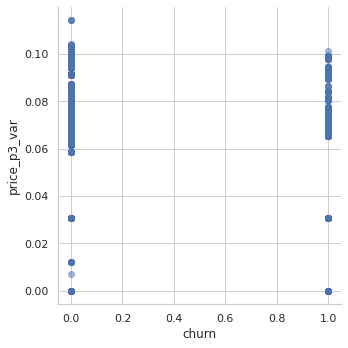

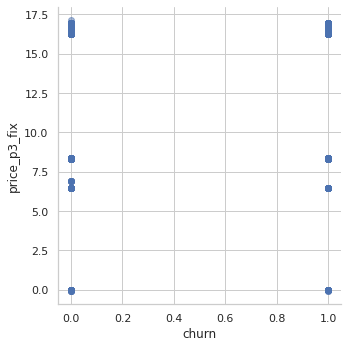

In [47]:
sns.lmplot(x='churn', y='price_p3_var', data=powerCoDataFrame, fit_reg=False, scatter_kws={'alpha':0.5});
sns.lmplot(x='churn', y='price_p3_fix', data=powerCoDataFrame, fit_reg=False, scatter_kws={'alpha':0.5});

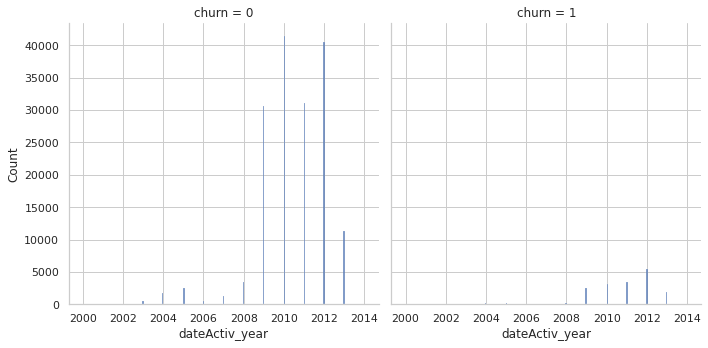

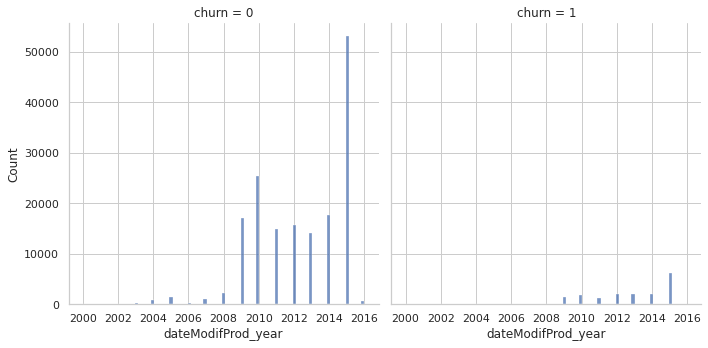

In [48]:
sns.displot(data=powerCoDataFrame, x="dateActiv_year", col="churn")
sns.displot(data=powerCoDataFrame, x="dateModifProd_year", col="churn")


In [49]:
powerCoDataFrame.shape

(182121, 43)

## Experimentos con modelos de aprendizaje automático

In [50]:
#for split data
from sklearn.model_selection import train_test_split

#models for experiments
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

#performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#scaler
from sklearn.preprocessing import MinMaxScaler

#oversample
from imblearn.over_sampling import RandomOverSampler

#others
from sklearn import tree
import graphviz
from collections import Counter

Se pretende implementar los siguientes modelos:
* Logistic Regression
* KNN
* Decision Trees
* SVM
* Naive Bayes

Para cada modelo, adicional a la prueba con diferentes hiperparámetros, se pretende hacer pruebas con los datos sin escalar y escalados y finalmente pruebas despues de haber realizado un oversample para balancear los datos

Lo primero que se realizará es separar los datos

In [51]:
#Primero se elimina el campo de id del set de datos
powerCoDataFrame.drop(['id'],axis=1,inplace=True)

In [52]:
#Separamos el dataframe unificado en un dataframe de features y un dataframe de targets
powerCoFeatures = powerCoDataFrame.copy(deep=True);
powerCoLabels = powerCoFeatures.pop('churn')

#Adicionalmente, generaremos los datasets escalados para los experimentos con los datos de esta forma
scaledPowerCoFeatures = powerCoFeatures.copy(deep=True)
scaledPowerCoLabels = powerCoLabels.copy(deep=True)
scaledPowerCoFeatures = scaledPowerCoFeatures.to_numpy()
scaledPowerCoLabels = scaledPowerCoLabels.to_numpy().reshape(-1,1)              #se realiza un reshape, de lo contrario lanzara error cuando se utilice el scaler

#se realiza el escalamiento
scaler = MinMaxScaler()

scaler.fit(scaledPowerCoFeatures)
scaledPowerCoFeatures = scaler.transform(scaledPowerCoFeatures)

scaler.fit(scaledPowerCoLabels)
scaledPowerCoLabels = scaler.transform(scaledPowerCoLabels)


#Se realiza la separación 80/20 para los dataframes escalados
powerCoTrainFeatures,powerCoTestFeatures,powerCoTrainLabels,powerCoTestLabels =train_test_split(powerCoFeatures,
                                                                                                powerCoLabels,
                                                                                                test_size=0.2,
                                                                                                random_state=10)

#Se realiza la separación 80/20 para los datasets escalados
scaledPowerCoTrainFeatures,scaledPowerCoTestFeatures,scaledPowerCoTrainLabels,scaledPowerCoTestLabels =train_test_split(scaledPowerCoFeatures,
                                                                                                scaledPowerCoLabels,
                                                                                                test_size=0.2,
                                                                                                random_state=10)


Seguidamente crearemos 2 funciones genéricas, la primera será para generar las predicciones, mientras que la segunda será para imprimir los resultados del modelo

In [53]:
#Funcion genérica para predecir, recibe el modelo así como los features de pruebas
def predictTestData(modelo,testFeatures):
    predictedResults = modelo.predict(testFeatures)
    return predictedResults

In [54]:
#Funcion genérica para medir el rendimiento del modelo, recibe los labels de pruebas y los valores predichos por el modelo
def modelResults(testLabels,predictedLabels):
    print('Accuracy: ',accuracy_score(testLabels,predictedLabels))
    print('Matriz de confusion: ',confusion_matrix(testLabels, predictedLabels))
    trueNegatives, falsePositives, falseNegatives, truePositives = confusion_matrix(testLabels, predictedLabels).ravel()
    print('Matriz de confusion, detalle:\nTrue Positives',truePositives,'\nTrue Negatives:',trueNegatives,'\nFalse Positives:',falsePositives,'\nFalse Negatives',falseNegatives)
    print('F1 Score: ',f1_score(testLabels,predictedLabels))

### Experimentos con datos no escalados

#### Logistic Regression

In [55]:
def trainLogisticRegression(trainFeatures,trainLabels,p_solver,p_randomState,p_warm_start,p_max_iter):

    modelo = LogisticRegression(
                solver=p_solver,
                random_state = p_randomState,
                max_iter = p_max_iter,
                warm_start = p_warm_start,
                multi_class = 'ovr' #no es un problema multiclase
            )
    return modelo.fit(trainFeatures,trainLabels)


***Experimento con solver liblinear***

Converge con solo 50 iteraciones y lanza un buen resultado de Accuracy, sin embargo, como los datos no están balanceados no es un buen indicador, esto se comprueba con el F1 score que lanza un resultado muy bajo, pasadas las 50 iteraciones no muestra mejoria


In [56]:
modeloEntrenadoLR  = trainLogisticRegression(powerCoTrainFeatures,powerCoTrainLabels,'liblinear',15,False,50)
prediccionesLR = predictTestData(modeloEntrenadoLR,powerCoTestFeatures)
modelResults(powerCoTestLabels,prediccionesLR)

Accuracy:  0.905971173644475
Matriz de confusion:  [[32997     0]
 [ 3425     3]]
Matriz de confusion, detalle:
True Positives 3 
True Negatives: 32997 
False Positives: 0 
False Negatives 3425
F1 Score:  0.0017487612940833574


***Experimento con solver lbfgs***

Converge con 200 iteraciones, presenta los mismos problemas de los resultados previos, pasadas las 200 iteraciones no muestra mejoria


In [57]:
modeloEntrenado  = trainLogisticRegression(powerCoTrainFeatures,powerCoTrainLabels,'lbfgs',15,True,200)
prediccionesLR = predictTestData(modeloEntrenadoLR,powerCoTestFeatures)
modelResults(powerCoTestLabels,prediccionesLR)

Accuracy:  0.905971173644475
Matriz de confusion:  [[32997     0]
 [ 3425     3]]
Matriz de confusion, detalle:
True Positives 3 
True Negatives: 32997 
False Positives: 0 
False Negatives 3425
F1 Score:  0.0017487612940833574


#### KNN - K-Nearest Neighbors

In [58]:
def trainKNN(trainFeatures,trainLabels,neighbors):
    modelo = KNeighborsClassifier(n_neighbors=neighbors)
    return modelo.fit(trainFeatures,trainLabels)

def trainKNN2(trainFeatures,trainLabels,neighbors):
    modelo = KNeighborsClassifier(n_neighbors=neighbors,p=1,weights='distance')
    return modelo.fit(trainFeatures,trainLabels)

Se realizan multiples experimentos, con un ajuste de maximo 5 vecinos muestra excelentes resultados, a partir de ahi se empieza a dregradar

In [59]:
modeloEntrenadoKNN  = trainKNN(powerCoTrainFeatures,powerCoTrainLabels,5)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,powerCoTestFeatures)
print('################### RESULTADOS CON 5 VECINOS ############################')
modelResults(powerCoTestLabels,prediccionesKNN)

modeloEntrenadoKNN  = trainKNN(powerCoTrainFeatures,powerCoTrainLabels,10)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,powerCoTestFeatures)
print('################### RESULTADOS CON 10 VECINOS ############################')
modelResults(powerCoTestLabels,prediccionesKNN)

################### RESULTADOS CON 5 VECINOS ############################
Accuracy:  1.0
Matriz de confusion:  [[32997     0]
 [    0  3428]]
Matriz de confusion, detalle:
True Positives 3428 
True Negatives: 32997 
False Positives: 0 
False Negatives 0
F1 Score:  1.0
################### RESULTADOS CON 10 VECINOS ############################
Accuracy:  0.9995058339052848
Matriz de confusion:  [[32997     0]
 [   18  3410]]
Matriz de confusion, detalle:
True Positives 3410 
True Negatives: 32997 
False Positives: 0 
False Negatives 18
F1 Score:  0.9973676513600469


Experimento modificando hiperparametros

In [60]:
modeloEntrenadoKNN  = trainKNN2(powerCoTrainFeatures,powerCoTrainLabels,1)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,powerCoTestFeatures)
print('################### RESULTADOS CON 1 VECINO ############################')
modelResults(powerCoTestLabels,prediccionesKNN)

modeloEntrenadoKNN  = trainKNN2(powerCoTrainFeatures,powerCoTrainLabels,10)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,powerCoTestFeatures)
print('################### RESULTADOS CON 10 VECINOS ############################')
modelResults(powerCoTestLabels,prediccionesKNN)

################### RESULTADOS CON 1 VECINO ############################
Accuracy:  1.0
Matriz de confusion:  [[32997     0]
 [    0  3428]]
Matriz de confusion, detalle:
True Positives 3428 
True Negatives: 32997 
False Positives: 0 
False Negatives 0
F1 Score:  1.0
################### RESULTADOS CON 10 VECINOS ############################
Accuracy:  1.0
Matriz de confusion:  [[32997     0]
 [    0  3428]]
Matriz de confusion, detalle:
True Positives 3428 
True Negatives: 32997 
False Positives: 0 
False Negatives 0
F1 Score:  1.0


Se presenta un mejor desempeño después del cambio en los hiperparámetros y aun utilizando 10 vecinos mantiene el rendimiento con metricas en 1

#### Arboles

##### Arboles de decisión

In [61]:
def trainDecisionTree(trainFeatures,trainLabels,a_maxDepth):
    modelo = DecisionTreeClassifier(max_depth = a_maxDepth)
    return modelo.fit(trainFeatures,trainLabels)

Experimentaremos con diferentes profundidades empezando en 5 y finalizando en 15

In [62]:
for a_maxDepth in range(5,16):
    modeloEntrenadoDT  = trainDecisionTree(powerCoTrainFeatures,powerCoTrainLabels,a_maxDepth)
    prediccionesDT = predictTestData(modeloEntrenadoDT,powerCoTestFeatures)
    print('################### RESULTADOS PARA PROFUNDIDAD: ',a_maxDepth,' ############################')
    modelResults(powerCoTestLabels,prediccionesDT)

################### RESULTADOS PARA PROFUNDIDAD:  5  ############################
Accuracy:  0.9110775566231983
Matriz de confusion:  [[32889   108]
 [ 3131   297]]
Matriz de confusion, detalle:
True Positives 297 
True Negatives: 32889 
False Positives: 108 
False Negatives 3131
F1 Score:  0.1549699973910775
################### RESULTADOS PARA PROFUNDIDAD:  6  ############################
Accuracy:  0.9139327385037749
Matriz de confusion:  [[32837   160]
 [ 2975   453]]
Matriz de confusion, detalle:
True Positives 453 
True Negatives: 32837 
False Positives: 160 
False Negatives 2975
F1 Score:  0.22420193021529328
################### RESULTADOS PARA PROFUNDIDAD:  7  ############################
Accuracy:  0.9180233356211394
Matriz de confusion:  [[32890   107]
 [ 2879   549]]
Matriz de confusion, detalle:
True Positives 549 
True Negatives: 32890 
False Positives: 107 
False Negatives 2879
F1 Score:  0.2688540646425074
################### RESULTADOS PARA PROFUNDIDAD:  8  #############

Se muestran buenos resultados conforme crece el arbol, por lo que se decide realizar una prueba sin definir el hiperparámetro de profundidad para permitirle crecer a hojas puras y ver como se comporta

In [63]:
modeloEntrenadoDT  = trainDecisionTree(powerCoTrainFeatures,powerCoTrainLabels,None)
prediccionesDT = predictTestData(modeloEntrenadoDT,powerCoTestFeatures)
modelResults(powerCoTestLabels,prediccionesDT)

Accuracy:  0.9999450926561427
Matriz de confusion:  [[32997     0]
 [    2  3426]]
Matriz de confusion, detalle:
True Positives 3426 
True Negatives: 32997 
False Positives: 0 
False Negatives 2
F1 Score:  0.9997081995914795


###### Graficas para arboles de decisión

Se obtiene un excelente resultado, se decide ver la importancia de las características y el arbol generado

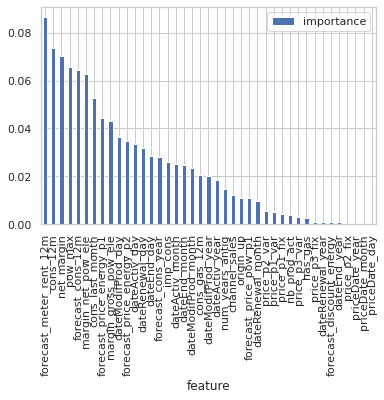

In [64]:
importances = pd.DataFrame({'feature' : powerCoTrainFeatures.columns, 'importance':modeloEntrenadoDT.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.plot.bar()

In [65]:
dot_data = tree.export_graphviz(modeloEntrenadoDT,
                                out_file=None, 
                      feature_names=powerCoTrainFeatures.columns,  
                      class_names=['Churn','NotChurn'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

##### Random Forest

In [66]:
def trainRandomForest(trainFeatures,trainLabels,a_numberOfTrees,a_maxDepth):
    modelo = RandomForestClassifier(n_estimators = a_numberOfTrees,max_depth=a_maxDepth)
    return modelo.fit(trainFeatures,trainLabels)

In [67]:
modeloEntrenadoRF  = trainRandomForest(powerCoTrainFeatures,powerCoTrainLabels,10,60)
prediccionesRF = predictTestData(modeloEntrenadoRF,powerCoTestFeatures)
modelResults(powerCoTestLabels,prediccionesRF)

Accuracy:  1.0
Matriz de confusion:  [[32997     0]
 [    0  3428]]
Matriz de confusion, detalle:
True Positives 3428 
True Negatives: 32997 
False Positives: 0 
False Negatives 0
F1 Score:  1.0


En este experimento en un tiempo similar al de arboles de decision simples, obtenemos un mejor resultado logrando una puntuación de 1 el la métrica de F1. (Para obtener los valores utilizados se realizaron multiples pruebas variando la profundidad y la cantidad de árboles)

#### Máquinas de Vector de Soporte - SVM

In [68]:
def trainSVM(trainFeatures,trainLabels,a_kernel,a_maxIter):
    modelo = svm.SVC(kernel=a_kernel,max_iter=a_maxIter)
    return modelo.fit(trainFeatures,trainLabels)

***Prueba utilizando el kernel linear***

In [69]:
modeloEntrenadoSVM  = trainSVM(powerCoTrainFeatures,powerCoTrainLabels,'linear',100)
prediccionesSVM = predictTestData(modeloEntrenadoSVM,powerCoTestFeatures)
modelResults(powerCoTestLabels,prediccionesSVM)

Accuracy:  0.12955387783115993
Matriz de confusion:  [[ 1321 31676]
 [   30  3398]]
Matriz de confusion, detalle:
True Positives 3398 
True Negatives: 1321 
False Positives: 31676 
False Negatives 30
F1 Score:  0.1765103111526674


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


***Prueba utilizando el kernel sigmoide***

In [70]:
modeloEntrenadoSVM  = trainSVM(powerCoTrainFeatures,powerCoTrainLabels,'sigmoid',100)
prediccionesSVM = predictTestData(modeloEntrenadoSVM,powerCoTestFeatures)
modelResults(powerCoTestLabels,prediccionesSVM)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.37326012354152366
Matriz de confusion:  [[11390 21607]
 [ 1222  2206]]
Matriz de confusion, detalle:
True Positives 2206 
True Negatives: 11390 
False Positives: 21607 
False Negatives 1222
F1 Score:  0.16196174883447745


Despues de realizar multiples experimentos, aumentando el limite de iteraciones y con los kernels indicados, el modelo no logra converger por lo que se decide no continuar experimentando con este. En el último experimento se definió la cantidad de iteraciones en -1 (sin limite) y luego de 1 hora no había logrado converger. Se deja el ejemplo con 100

#### Naive Bayes

In [71]:
def trainNB(trainFeatures,trainLabels):
    modelo = GaussianNB()
    return modelo.fit(trainFeatures,trainLabels)

In [72]:
modeloEntrenadoNB  = trainNB(powerCoTrainFeatures,powerCoTrainLabels)
prediccionesNB = predictTestData(modeloEntrenadoNB,powerCoTestFeatures)
modelResults(powerCoTestLabels,prediccionesNB)

Accuracy:  0.8454358270418668
Matriz de confusion:  [[30486  2511]
 [ 3119   309]]
Matriz de confusion, detalle:
True Positives 309 
True Negatives: 30486 
False Positives: 2511 
False Negatives 3119
F1 Score:  0.09891165172855314


No se muestran buenos resultados utilizando el modelo Gaussiano

### Experimentos con datos escalados

Primero realizamos un ravel a los labels para poder trabajarlos

In [73]:
scaledPowerCoTrainLabels=scaledPowerCoTrainLabels.ravel()
scaledPowerCoTestLabels=scaledPowerCoTestLabels.ravel()

#### Logistic Regression

***Experimento con liblinear***

In [74]:
modeloEntrenadoLR  = trainLogisticRegression(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,'liblinear',15,False,50)
prediccionesLR = predictTestData(modeloEntrenadoLR,scaledPowerCoTestFeatures)
modelResults(scaledPowerCoTestLabels,prediccionesLR)

Accuracy:  0.9059162663006177
Matriz de confusion:  [[32993     4]
 [ 3423     5]]
Matriz de confusion, detalle:
True Positives 5 
True Negatives: 32993 
False Positives: 4 
False Negatives 3423
F1 Score:  0.002909514111143439


Al igual que con los datos no escalados, con 50 iteraciones converge, un accuracy alto, sin embargo, los datos estan no escalados, no muestra mejoría pasadas 50 iteraciones

***Experimento con solver lbfgs***

In [75]:
modeloEntrenado  = trainLogisticRegression(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,'lbfgs',15,True,400)
prediccionesLR = predictTestData(modeloEntrenadoLR,scaledPowerCoTestFeatures)
modelResults(scaledPowerCoTestLabels,prediccionesLR)

Accuracy:  0.9059162663006177
Matriz de confusion:  [[32993     4]
 [ 3423     5]]
Matriz de confusion, detalle:
True Positives 5 
True Negatives: 32993 
False Positives: 4 
False Negatives 3423
F1 Score:  0.002909514111143439


En este caso, mantiene los problemas de balanceo, pero se requieren mas iteraciones para converger, 400 en este caso y pasada esta cantidad de iteraciones no muestra mejoría

#### KNN - K-Nearest Neighbors

In [76]:
modeloEntrenadoKNN  = trainKNN(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,5)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,scaledPowerCoTestFeatures)
print('################### RESULTADOS CON 5 VECINOS ############################')
modelResults(scaledPowerCoTestLabels,prediccionesKNN)

modeloEntrenadoKNN  = trainKNN(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,10)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,scaledPowerCoTestFeatures)
print('################### RESULTADOS CON 10 VECINOS ############################')
modelResults(scaledPowerCoTestLabels,prediccionesKNN)

################### RESULTADOS CON 5 VECINOS ############################
Accuracy:  0.9557995881949211
Matriz de confusion:  [[32498   499]
 [ 1111  2317]]
Matriz de confusion, detalle:
True Positives 2317 
True Negatives: 32498 
False Positives: 499 
False Negatives 1111
F1 Score:  0.742152466367713
################### RESULTADOS CON 10 VECINOS ############################
Accuracy:  0.9354564172958133
Matriz de confusion:  [[32831   166]
 [ 2185  1243]]
Matriz de confusion, detalle:
True Positives 1243 
True Negatives: 32831 
False Positives: 166 
False Negatives 2185
F1 Score:  0.5139549307421956


El experimento anterior muestra resultados mas bajos con respecto a cuando los datos no estaban escalados.

In [77]:
modeloEntrenadoKNN  = trainKNN2(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,1)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,scaledPowerCoTestFeatures)
print('################### RESULTADOS CON 1 VECINO ############################')
modelResults(scaledPowerCoTestLabels,prediccionesKNN)

modeloEntrenadoKNN  = trainKNN2(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,10)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,scaledPowerCoTestFeatures)
print('################### RESULTADOS CON 10 VECINOS ############################')
modelResults(scaledPowerCoTestLabels,prediccionesKNN)

################### RESULTADOS CON 1 VECINO ############################
Accuracy:  0.9892656142759094
Matriz de confusion:  [[32802   195]
 [  196  3232]]
Matriz de confusion, detalle:
True Positives 3232 
True Negatives: 32802 
False Positives: 195 
False Negatives 196
F1 Score:  0.9429613420860685
################### RESULTADOS CON 10 VECINOS ############################
Accuracy:  0.9884694577899794
Matriz de confusion:  [[32902    95]
 [  325  3103]]
Matriz de confusion, detalle:
True Positives 3103 
True Negatives: 32902 
False Positives: 95 
False Negatives 325
F1 Score:  0.9366133413824329


#### Arboles

##### Decision Trees

In [78]:
for a_maxDepth in range(5,16):
    modeloEntrenadoDT  = trainDecisionTree(powerCoTrainFeatures,powerCoTrainLabels,a_maxDepth)
    prediccionesDT = predictTestData(modeloEntrenadoDT,powerCoTestFeatures)
    print('################### RESULTADOS PARA PROFUNDIDAD: ',a_maxDepth,' ############################')
    modelResults(powerCoTestLabels,prediccionesDT)

################### RESULTADOS PARA PROFUNDIDAD:  5  ############################
Accuracy:  0.9110775566231983
Matriz de confusion:  [[32889   108]
 [ 3131   297]]
Matriz de confusion, detalle:
True Positives 297 
True Negatives: 32889 
False Positives: 108 
False Negatives 3131
F1 Score:  0.1549699973910775
################### RESULTADOS PARA PROFUNDIDAD:  6  ############################
Accuracy:  0.9139327385037749
Matriz de confusion:  [[32837   160]
 [ 2975   453]]
Matriz de confusion, detalle:
True Positives 453 
True Negatives: 32837 
False Positives: 160 
False Negatives 2975
F1 Score:  0.22420193021529328
################### RESULTADOS PARA PROFUNDIDAD:  7  ############################
Accuracy:  0.9180233356211394
Matriz de confusion:  [[32890   107]
 [ 2879   549]]
Matriz de confusion, detalle:
True Positives 549 
True Negatives: 32890 
False Positives: 107 
False Negatives 2879
F1 Score:  0.2688540646425074
################### RESULTADOS PARA PROFUNDIDAD:  8  #############

In [79]:
modeloEntrenadoDT  = trainDecisionTree(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,None)
prediccionesDT = predictTestData(modeloEntrenadoDT,scaledPowerCoTestFeatures)
modelResults(scaledPowerCoTestLabels,prediccionesDT)

Accuracy:  0.9998901853122856
Matriz de confusion:  [[32996     1]
 [    3  3425]]
Matriz de confusion, detalle:
True Positives 3425 
True Negatives: 32996 
False Positives: 1 
False Negatives 3
F1 Score:  0.9994163991829588


Se realizaron multiples experimentos y mantiene la tendencia de mejorar conforme más hojas, replicando el experimento de no limitar la cantidad de hojas, se tiene una ligera mejoría de rendimiento

##### Random Forest

In [80]:
modeloEntrenadoRF  = trainRandomForest(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,7,50)
prediccionesRF = predictTestData(modeloEntrenadoRF,scaledPowerCoTestFeatures)
modelResults(scaledPowerCoTestLabels,prediccionesRF)

Accuracy:  0.9999725463280714
Matriz de confusion:  [[32997     0]
 [    1  3427]]
Matriz de confusion, detalle:
True Positives 3427 
True Negatives: 32997 
False Positives: 0 
False Negatives 1
F1 Score:  0.999854121079504


Para el Random Forest se logro reducir la cantidad de arboles asi como su profundidad obteniendo los mismos resultados que con los datos sin escalar

#### SVM

***Prueba utilizando el kernel linear***

In [81]:
modeloEntrenadoSVM  = trainSVM(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,'linear',100)
prediccionesSVM = predictTestData(modeloEntrenadoSVM,scaledPowerCoTestFeatures)
modelResults(scaledPowerCoTestLabels,prediccionesSVM)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.4066437886067262
Matriz de confusion:  [[12513 20484]
 [ 1129  2299]]
Matriz de confusion, detalle:
True Positives 2299 
True Negatives: 12513 
False Positives: 20484 
False Negatives 1129
F1 Score:  0.17542253252451262


***Prueba utilizando el kernel sigmoide***

In [82]:
modeloEntrenadoSVM  = trainSVM(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels,'sigmoid',100)
prediccionesSVM = predictTestData(modeloEntrenadoSVM,scaledPowerCoTestFeatures)
modelResults(scaledPowerCoTestLabels,prediccionesSVM)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.5019080301990391
Matriz de confusion:  [[17056 15941]
 [ 2202  1226]]
Matriz de confusion, detalle:
True Positives 1226 
True Negatives: 17056 
False Positives: 15941 
False Negatives 2202
F1 Score:  0.11905802379218257


Misma situación que con experimentos previos

#### Naive Bayes

In [83]:
modeloEntrenadoNB  = trainNB(scaledPowerCoTrainFeatures,scaledPowerCoTrainLabels)
prediccionesNB = predictTestData(modeloEntrenadoNB,scaledPowerCoTestFeatures)
modelResults(scaledPowerCoTestLabels,prediccionesNB)

Accuracy:  0.565710363761153
Matriz de confusion:  [[18501 14496]
 [ 1323  2105]]
Matriz de confusion, detalle:
True Positives 2105 
True Negatives: 18501 
False Positives: 14496 
False Negatives 1323
F1 Score:  0.2101952169354436


Sigue sin mostras buenos resultados, aunque si se nota una mejora en el score F1

### Experimentos utilizando tecnica de oversample

Lo primero que hacemos es realizar el oversampling

In [84]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
overSampleFeatures, overSampleLabels = ros.fit_resample(scaledPowerCoFeatures, scaledPowerCoLabels)
print('Resultados despues de balancear')
print(sorted(Counter(overSampleLabels).items()))

Resultados despues de balancear
[(0.0, 164823), (1.0, 164823)]


Seguidamente hacemos la separacion de los datos en training y testing utilizando la regla de 80/20 nuevamente

In [85]:
overSampleTrainFeatures,overSampleTestFeatures,overSampleTrainLabels,overSampleTestLabels =train_test_split(overSampleFeatures,
                                                                                                overSampleLabels,
                                                                                                test_size=0.2,
                                                                                                random_state=10)

#### Logistic Regression

***Experimento con liblinear***

In [86]:
modeloEntrenadoLR  = trainLogisticRegression(overSampleTrainFeatures,overSampleTrainLabels,'liblinear',15,False,50)
prediccionesLR = predictTestData(modeloEntrenadoLR,overSampleTestFeatures)
modelResults(overSampleTestLabels,prediccionesLR)

Accuracy:  0.6079326558471105
Matriz de confusion:  [[19209 13865]
 [11984 20872]]
Matriz de confusion, detalle:
True Positives 20872 
True Negatives: 19209 
False Positives: 13865 
False Negatives 11984
F1 Score:  0.6175787433609989


Logra converger con 50 iteraciones como los experimentos anteriores, sin embargo, si se nota una considerable reducción en el Accuracy aunque el F1 score mejora

***Experimento con solver lbfgs***

In [87]:
modeloEntrenado  = trainLogisticRegression(overSampleTrainFeatures,overSampleTrainLabels,'lbfgs',15,True,600)
prediccionesLR = predictTestData(modeloEntrenadoLR,overSampleTestFeatures)
modelResults(overSampleTestLabels,prediccionesLR)

Accuracy:  0.6079326558471105
Matriz de confusion:  [[19209 13865]
 [11984 20872]]
Matriz de confusion, detalle:
True Positives 20872 
True Negatives: 19209 
False Positives: 13865 
False Negatives 11984
F1 Score:  0.6175787433609989


#### KNN - K-Nearest Neighbors

In [88]:
modeloEntrenadoKNN  = trainKNN(overSampleTrainFeatures,overSampleTrainLabels,5)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,overSampleTestFeatures)
print('################### RESULTADOS CON 5 VECINOS ############################')
modelResults(overSampleTestLabels,prediccionesKNN)

modeloEntrenadoKNN  = trainKNN(overSampleTrainFeatures,overSampleTrainLabels,10)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,overSampleTestFeatures)
print('################### RESULTADOS CON 10 VECINOS ############################')
modelResults(overSampleTestLabels,prediccionesKNN)

################### RESULTADOS CON 5 VECINOS ############################
Accuracy:  0.9669042924313666
Matriz de confusion:  [[30905  2169]
 [   13 32843]]
Matriz de confusion, detalle:
True Positives 32843 
True Negatives: 30905 
False Positives: 2169 
False Negatives 13
F1 Score:  0.967849354629575
################### RESULTADOS CON 10 VECINOS ############################
Accuracy:  0.9441073866221751
Matriz de confusion:  [[29474  3600]
 [   85 32771]]
Matriz de confusion, detalle:
True Positives 32771 
True Negatives: 29474 
False Positives: 3600 
False Negatives 85
F1 Score:  0.9467693241076459


Mantiene la tendencia de bajar el rendimiento con más vecinos, sin embargo, en este caso tenemos un Accuracy y F1 mas parejos y con muy buenos resultados

Experimento modificando los hiperparametros

In [89]:
modeloEntrenadoKNN  = trainKNN2(overSampleTrainFeatures,overSampleTrainLabels,1)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,overSampleTestFeatures)
print('################### RESULTADOS CON 1 VECINO ############################')
modelResults(overSampleTestLabels,prediccionesKNN)

modeloEntrenadoKNN  = trainKNN2(overSampleTrainFeatures,overSampleTrainLabels,10)
prediccionesKNN = predictTestData(modeloEntrenadoKNN,overSampleTestFeatures)
print('################### RESULTADOS CON 10 VECINOS ############################')
modelResults(overSampleTestLabels,prediccionesKNN)

################### RESULTADOS CON 1 VECINO ############################
Accuracy:  0.9964962839375094
Matriz de confusion:  [[32843   231]
 [    0 32856]]
Matriz de confusion, detalle:
True Positives 32856 
True Negatives: 32843 
False Positives: 231 
False Negatives 0
F1 Score:  0.9964969746599336
################### RESULTADOS CON 10 VECINOS ############################
Accuracy:  0.9831336265736387
Matriz de confusion:  [[31962  1112]
 [    0 32856]]
Matriz de confusion, detalle:
True Positives 32856 
True Negatives: 31962 
False Positives: 1112 
False Negatives 0
F1 Score:  0.983359272117802


Al igual que en casos anteriores, mejores resultados con los nuevos parámetros, y mas consistente con diferente cantidad de vecinos

#### Arboles

##### Decision Trees

In [90]:
for a_maxDepth in range(5,16):
    modeloEntrenadoDT  = trainDecisionTree(overSampleTrainFeatures,overSampleTrainLabels,a_maxDepth)
    prediccionesDT = predictTestData(modeloEntrenadoDT,overSampleTestFeatures)
    print('################### RESULTADOS PARA PROFUNDIDAD: ',a_maxDepth,' ############################')
    modelResults(overSampleTestLabels,prediccionesDT)

################### RESULTADOS PARA PROFUNDIDAD:  5  ############################
Accuracy:  0.6334900652206886
Matriz de confusion:  [[25075  7999]
 [16165 16691]]
Matriz de confusion, detalle:
True Positives 16691 
True Negatives: 25075 
False Positives: 7999 
False Negatives 16165
F1 Score:  0.5800924477809056
################### RESULTADOS PARA PROFUNDIDAD:  6  ############################
Accuracy:  0.6486880024268163
Matriz de confusion:  [[25545  7529]
 [15633 17223]]
Matriz de confusion, detalle:
True Positives 17223 
True Negatives: 25545 
False Positives: 7529 
False Negatives 15633
F1 Score:  0.597937786418553
################### RESULTADOS PARA PROFUNDIDAD:  7  ############################
Accuracy:  0.6813741847413924
Matriz de confusion:  [[24389  8685]
 [12322 20534]]
Matriz de confusion, detalle:
True Positives 20534 
True Negatives: 24389 
False Positives: 8685 
False Negatives 12322
F1 Score:  0.6615867901731777
################### RESULTADOS PARA PROFUNDIDAD:  8  ###

In [91]:
modeloEntrenadoDT  = trainDecisionTree(overSampleTrainFeatures,overSampleTrainLabels,40)
prediccionesDT = predictTestData(modeloEntrenadoDT,overSampleTestFeatures)
modelResults(overSampleTestLabels,prediccionesDT)

Accuracy:  1.0
Matriz de confusion:  [[33074     0]
 [    0 32856]]
Matriz de confusion, detalle:
True Positives 32856 
True Negatives: 33074 
False Positives: 0 
False Negatives 0
F1 Score:  1.0


Vemos la tendencia a mejora conforme se agrega más profundidad, solo que en este caso, con solo 40 de profundidad logra alcanzar el F1 y Accuracy de 1

##### Random Forest

In [92]:
modeloEntrenadoRF  = trainRandomForest(overSampleTrainFeatures,overSampleTrainLabels,5,30)
prediccionesRF = predictTestData(modeloEntrenadoRF,overSampleTestFeatures)
modelResults(overSampleTestLabels,prediccionesRF)

Accuracy:  0.9999696647959958
Matriz de confusion:  [[33072     2]
 [    0 32856]]
Matriz de confusion, detalle:
True Positives 32856 
True Negatives: 33072 
False Positives: 2 
False Negatives 0
F1 Score:  0.9999695650850655


#### SVM

***Prueba utilizando el kernel linear***

In [94]:
modeloEntrenadoSVM  = trainSVM(overSampleTrainFeatures,overSampleTrainLabels,'linear',100)
prediccionesSVM = predictTestData(modeloEntrenadoSVM,overSampleTestFeatures)
modelResults(overSampleTestLabels,prediccionesSVM)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.4932655847110572
Matriz de confusion:  [[13527 19547]
 [13862 18994]]
Matriz de confusion, detalle:
True Positives 18994 
True Negatives: 13527 
False Positives: 19547 
False Negatives 13862
F1 Score:  0.5320671736907713


***Experimento con solver lbfgs***

In [95]:
modeloEntrenadoSVM  = trainSVM(overSampleTrainFeatures,overSampleTrainLabels,'sigmoid',100)
prediccionesSVM = predictTestData(modeloEntrenadoSVM,overSampleTestFeatures)
modelResults(overSampleTestLabels,prediccionesSVM)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.44617018049446383
Matriz de confusion:  [[15981 17093]
 [19421 13435]]
Matriz de confusion, detalle:
True Positives 13435 
True Negatives: 15981 
False Positives: 17093 
False Negatives 19421
F1 Score:  0.423924018679793


Misma situación que con experimentos previos

#### Naive Bayes

In [96]:
modeloEntrenadoNB  = trainNB(overSampleTrainFeatures,overSampleTrainLabels)
prediccionesNB = predictTestData(modeloEntrenadoNB,overSampleTestFeatures)
modelResults(overSampleTestLabels,prediccionesNB)

Accuracy:  0.5320339754284847
Matriz de confusion:  [[ 7036 26038]
 [ 4815 28041]]
Matriz de confusion, detalle:
True Positives 28041 
True Negatives: 7036 
False Positives: 26038 
False Negatives 4815
F1 Score:  0.64510266290907


## Conclusiones

### Resultados experimentos

Luego de los diversos experimentos realizados y obtener las métricas evaluando los datos separados para testing obtenemos los siguientes resultados:

**Regresión Logistica**

El solver liblinear se desempeña mejor, requiriendo menos iteraciones y obteniendo resultados de F1 y Accuracy iguales con ambos solvers.
Cuando los datos no estan balanceados, obtiene muy buenos resultados de Accuracy, pero el F1 es muy bajo. Una vez balanceados los datos, disminuye considerablemente su Accuracy y aumenta bastante el F1, pero con valores de 0.6.

Debido a estos resultados se concluye que no es buen modelo para el problema tratado

**KNN** 

Se obtienen mejores resultados con el hiperparámetro de *weighs* en 'distance' y con el hiperparámetro *p* en 1. Con datos no balanceados se logran obtener valores de 1 para Accuracy y F1 sin los datos balanceados, con los datos balanceados no se logra y en todos los casos presenta una degradación de rendimiento entre más vecinos se agregan.


**Arboles de decisión**

Con datos no balanceados, muestra buenos resultados, incrementando conforme se agregan más hojas, si no se limita el número de hojas llega a valores de 0.9 para Accuracy y F1. Con datos balanceados fue posible alcanzar un valor de 1 tanto para Accuracy como para F1 y limitando el numero de hojas a 40 previniendo un posible overfitting.

**Random Forest**

Muestra muy buenos resultados en todos los experimentos, siendo posible alcanzar valores de 1 para Accuracy y F1 en todos los experimentos. El mejor escenario se presenta con datos balanceados donde se logro estos resultados con 5 arboles de profundidad 30

**Naive Bayes**

El mejor resultado lo presentó con datos balanceados, obteniendo un Accuracy de 0.5 y un F1 de 0.6.

Debido a esto se considera que no es un buen modelo para el problema trabajado

**SVM**

Luego de multiples pruebas con diferentes kernels no se logró hacerlo converger, los experimentos más grandes se realizaron sin limitar el limite de iteraciones y con un espacio de 1 hora para ver si convergía, sin resultados exitosos.



### Conclusión final

Para la conclusión final, se considerarán de mayor relevancia los resultados de los experimentos luego de realizar el oversample, esto dado al sesgo que puede provocar los datos no balanceados y más con un desbalanceo tan grande como el que se muestra en el set de datos trabajado.

Con base en los experimentos realizados, KNN, Arboles de Decisión y Random Forest, muestran los mejores resultados.

Sin embargo, para este problema se considera que el modelo final debe de ser el de **árboles de decisión**.


Se llega a esta conclusión dado que sus mejores resultados los presenta  limitando la profundidad de este, que en este caso menor profundidad ayuda a prevenir sobreajuste. Adicionalmente en tiempo de ejecución es mejor que el Random Forest y mucho mejor que el KNN.


Random Forest también obtiene sus mejores resultados pudiendo reducir la profundidad del arbol y la cantidad de arboles. Sin embargo, es computacionalmente más costoso por lo que no sería necesario en este problema viendo los resultados de arboles simples.


KNN se sospecha de un sobreajuste debido a su tendencia a la baja entre más vecinos se agregan, sintoma de sobre ajuste en KNN, debido a esto se descarta.

